<a href="https://colab.research.google.com/github/aashish10raj/GFG_21Projects_Course/blob/main/Project11/11_The_AI_Swiss_Army_Knife__One_Line_Solutions_with_Hugging_Face_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging Face Pipelines Demo

This notebook demonstrates how to use the **Hugging Face `transformers` library** for a variety of natural language processing and computer vision tasks. Each section introduces a pipeline, loads a pre-trained model, and shows example usage.

## Covered Tasks
1. **Sentiment Analysis** – Classify text sentiment (positive/negative).  
2. **Text Summarization** – Generate concise summaries of long text.  
3. **Question Answering** – Answer questions from a given context.  
4. **Named Entity Recognition (NER)** – Extract entities like names, dates, and organizations.  
5. **Text Generation** – Generate coherent text given a prompt.  
6. **Image Classification** – Classify objects in an image.  
7. **Object Detection** – Detect and localize objects in an image.  
8. **Image Segmentation** – Segment different objects in an image.  
9. **Translation** – Translate text between languages.  
10. **Zero-Shot Classification** – Classify text without task-specific training.  
11. **Image Captioning** – Generate descriptive captions for images.  

## Requirements
- `transformers`  
- `torch`  
- `requests`  
- `PIL`  
- `matplotlib`

In [4]:
!pip install transformers

import requests
from io import BytesIO
from transformers import pipeline
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt

## 1. Sentiment Analysis

Sentiment analysis is the task of determining the emotional tone behind a piece of text. It helps identify whether the sentiment expressed is positive, negative, or neutral. This is widely used in analyzing customer feedback, social media monitoring, and understanding public opinion.

In [2]:
sentiment_analyzer = pipeline('sentiment-analysis', model="FacebookAI/roberta-large-mnli")

text = "I love using Hugging Face pipelines, they are so easy to use!"
result = sentiment_analyzer(text)

print(result)
print(result[0]['label'])
print(result[0]['score'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at FacebookAI/roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'label': 'NEUTRAL', 'score': 0.9780253767967224}]
NEUTRAL
0.9780253767967224


## 2. Text Summarization

Text summarization is the task of creating a shorter version of a text that still conveys the main points and information of the original document. It is useful for quickly understanding the content of long articles, reports, or documents, and for generating concise previews or summaries.

In [3]:
summarizer = pipeline('summarization')

text = """
Hugging Face is an artificial intelligence company based in New York City and Paris. It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture. The library is widely used for natural language processing tasks such as text classification, sentiment analysis, question answering, and text generation. Hugging Face also provides a platform for hosting and sharing machine learning models, datasets, and demos. The company has become a central hub for the open-source AI community, with a focus on democratizing AI through open models and tools.
"""

summary = summarizer(text, max_length=50, min_length=10, do_sample=False)

print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


 Hugging Face is an artificial intelligence company based in New York City and Paris . It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture . The company has become a


## 3. Question Answering

Question Answering is the task of extracting an answer to a question from a given text (context). The model reads the context and finds the span of text that best answers the question. This is particularly useful for building chatbots, information retrieval systems, and educational tools where users need quick answers from documents.

In [ ]:
question_answerer = pipeline('question-answering')

context = """
Hugging Face is an artificial intelligence company based in New York City and Paris. It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture. The library is widely used for natural language processing tasks such as text classification, sentiment analysis, question answering, and text generation. Hugging Face also provides a platform for hosting and sharing machine learning models, datasets, and demos. The company has become a central hub for the open-source AI community, with a focus on democratizing AI through open models and tools.
"""
question = "Where is Hugging Face based?"

answer = question_answerer(question=question, context=context)

print(answer)

## 4. Named Entity Recognition (NER)

Named Entity Recognition (NER) is the task of identifying and classifying named entities in text into predefined categories such as person names, organizations, locations, dates, etc. It helps in extracting structured information from unstructured text and is fundamental for many downstream NLP tasks like information extraction, question answering, and text summarization.

In [ ]:
ner_pipeline = pipeline('ner', grouped_entities=True)

text = "Apple is a company located in New York City and Paris but I like Oranges more"

entities = ner_pipeline(text)

print(entities)

## 5. Text Generation

Text Generation is the task of creating new text based on a given prompt or starting text. The model predicts the next word or sequence of words, allowing for the creation of stories, articles, poems, code, and more. It is a fundamental capability for applications like chatbots, content creation tools, and creative writing assistants.

In [ ]:
text_generator = pipeline('text-generation')

prompt = "The quick brown fox jumps over the lazy"

generated_text = text_generator(prompt, max_length=30, num_return_sequences=1)

print(generated_text[0]['generated_text'])

## 6. Image classification

Image Classification is the task of assigning a label or category to an entire image. The model analyzes the visual content of an image and predicts what it represents, choosing from a predefined set of classes. This is a fundamental task in computer vision with applications ranging from organizing photo libraries and content moderation to medical image analysis and autonomous driving.

In [ ]:
image_classifier = pipeline("image-classification")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

classification_results = image_classifier(image)


plt.imshow(image)
plt.axis("off")
plt.show()


for classes in classification_results[:2]:
  print(classes['label'], classes['score'])

## 7. Object Detection

Object Detection is a computer vision task that involves identifying and locating instances of predefined objects within an image or video. It not only classifies what objects are present but also provides their precise location using bounding boxes. This is crucial for applications like autonomous driving, surveillance, image search, and robotics.

In [ ]:
object_detector = pipeline("object-detection")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

detection_results = object_detector(image)
print(detection_results)

draw = ImageDraw.Draw(image)
for obj in detection_results:
    box = obj["box"]
    label = obj["label"]
    score = obj["score"]

    # Draw rectangle
    draw.rectangle(
        [(box["xmin"], box["ymin"]), (box["xmax"], box["ymax"])],
        outline="blue", width=7
    )
    # Add label + score
    draw.text((box["xmin"], box["ymin"] - 10), f"{label} ({score:.2f})", fill="red")


plt.imshow(image)
plt.axis("off")
plt.show()

## 8. Image Segmentation

Image Segmentation is a computer vision task that involves partitioning an image into multiple segments or regions, often to identify and delineate objects or areas of interest at a pixel level. Unlike object detection which draws bounding boxes, segmentation provides a more detailed understanding of the image by outlining the exact shape of objects. It is used in applications like medical imaging, autonomous driving, and image editing.

In [ ]:
image_segmentor = pipeline("image-segmentation")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

segmentation_results = image_segmentor(image)
print(segmentation_results)

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

plt.figure(figsize=(12, 12))
for i, result in enumerate(segmentation_results):
    mask = result["mask"]  # segmentation mask
    label = result["label"]
    plt.subplot(1, len(segmentation_results), i+1)
    plt.imshow(mask)
    plt.axis("off")
    plt.title(label)

plt.show()

## 9. Translation

Machine Translation is the task of automatically converting text from one language to another. It allows for communication across language barriers and is used in various applications, including real-time translation services, document translation, and localization of software and content.

In [ ]:
translator = pipeline('translation', model='Helsinki-NLP/opus-mt-en-fr')

english_text = "Hello, how are you today?"

translated_text = translator(english_text)

print(translated_text)

## 10. Zero-Shot Classification

Zero-Shot Classification is a machine learning task where the model is able to classify instances into categories it has not seen during training. Instead of learning to classify based on example data for each category, it uses descriptions or embeddings of the categories. This is particularly powerful when dealing with a large number of potential classes or when new classes emerge frequently, reducing the need for extensive labeled training data for every new category. It relies on the model's ability to generalize from learned concepts to new, unseen ones based on the semantic relationship between the input and the category descriptions.

In [ ]:
zero_shot_classifier = pipeline('zero-shot-classification')

sequence_to_classify = "This is a great movie about the future of AI."

candidate_labels = ["politics", "technology", "entertainment", "business"]

classification_results = zero_shot_classifier(sequence_to_classify, candidate_labels)

print(classification_results)

## 11. Image Captioning

Image Captioning is a multimodal task that involves generating a descriptive text caption for an image. It requires a model to understand both the visual content of an image and be able to generate coherent and relevant language. This task bridges the gap between computer vision and natural language processing and has applications in accessibility (describing images for visually impaired users), image indexing and search, and generating descriptions for products or content.

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2242: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


Image-to-text pipeline loaded.
Generated Caption: [{'generated_text': 'two cats sleeping on a couch'}]


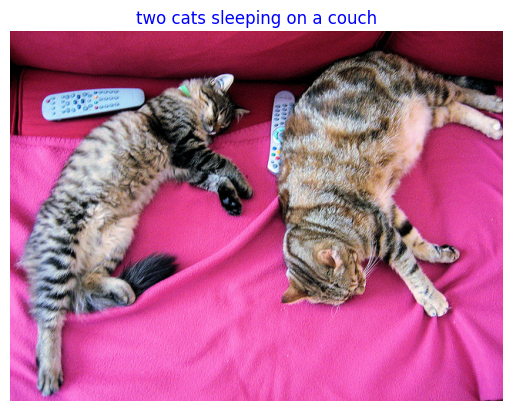

In [5]:
image_captioner = pipeline('image-to-text', model="Salesforce/blip-image-captioning-base")
print("Image-to-text pipeline loaded.")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

caption_results = image_captioner(image)
print("Generated Caption:", caption_results)

plt.imshow(image)
plt.axis("off")
plt.title(caption_results[0]["generated_text"], fontsize=12, color="blue")
plt.show()

## Project Summary

This notebook provides a hands-on introduction to various natural language processing and computer vision tasks using the Hugging Face `transformers` library. We explored the following pipelines:

-   **Sentiment Analysis:** Classifying text sentiment.
-   **Text Summarization:** Generating concise summaries of text.
-   **Question Answering:** Extracting answers from a given context.
-   **Named Entity Recognition (NER):** Identifying and classifying named entities in text.
-   **Text Generation:** Creating new text based on a prompt.
-   **Image Classification:** Assigning a label to an entire image.
-   **Object Detection:** Identifying and locating objects in an image with bounding boxes.
-   **Image Segmentation:** Partitioning an image into multiple segments to delineate objects.
-   **Translation:** Converting text from one language to another.
-   **Zero-Shot Classification:** Classifying text into categories not seen during training.
-   **Image Captioning:** Generating descriptive text captions for images.

Each section demonstrated how to load the respective pipeline and apply it to example data, showcasing the power and ease of use of the Hugging Face ecosystem for various AI tasks. The notebook concludes with an assignment task to explore image generation using diffusion models.

## Assignment: Image Generation with Diffusion Models

For this assignment, you will explore the use of diffusion models for image generation using the Hugging Face `transformers` library.

Take any model from https://huggingface.co/stabilityai

**Task:**

1.  **Choose a Diffusion Model:** Select a diffusion model available on the Hugging Face Hub. You can explore models from popular libraries like `diffusers`.
2.  **Load the Pipeline:** Load the appropriate pipeline for image generation using the chosen diffusion model.
3.  **Generate Images:** Generate one or more images using the pipeline with different prompts and parameters.
4.  **Display and Discuss:** Display the generated images and write a brief discussion about:
    *   The model you chose and why.
    *   The prompts and parameters you used for generation.
    *   Your observations about the quality and characteristics of the generated images.
    *   Any challenges or interesting findings you encountered.

**Requirements:**

*   Your code should be in a new code cell following this markdown section.
*   Clearly indicate the model you are using in your code or discussion.
*   Use `matplotlib` or other appropriate libraries to display the generated images within the notebook.
*   Provide a clear and concise discussion of your work in a markdown cell below the code.

This assignment will give you hands-on experience with state-of-the-art image generation techniques using the powerful tools provided by Hugging Face.

In [4]:
!pip install diffusers accelerate

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Diffusion pipeline for runwayml/stable-diffusion-v1-5 loaded.


  0%|          | 0/50 [00:00<?, ?it/s]

Image generated successfully.


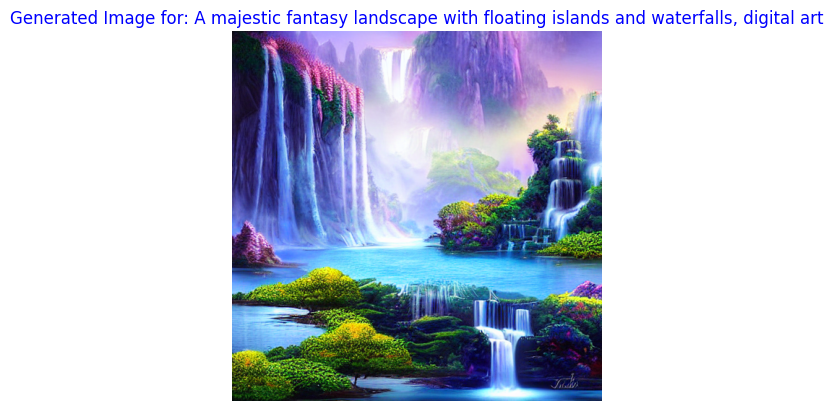

In [1]:
from diffusers import DiffusionPipeline
import matplotlib.pyplot as plt # Import matplotlib



# Using a lighter-weight model: runwayml/stable-diffusion-v1-5
model_id = "runwayml/stable-diffusion-v1-5"

# Load the diffusion pipeline
try:
    image_generator = DiffusionPipeline.from_pretrained(model_id)
    print(f"Diffusion pipeline for {model_id} loaded.")
except Exception as e:
    print(f"Error loading model {model_id}: {e}")
    # You might want to try a different model if this one fails

# Generate an image
prompt = "A majestic fantasy landscape with floating islands and waterfalls, digital art"
try:
    generated_image = image_generator(prompt).images[0]
    print("Image generated successfully.")
except Exception as e:
    print(f"Error generating image: {e}")
    generated_image = None


# Display the generated image
if generated_image:
    plt.imshow(generated_image)
    plt.axis("off")
    plt.title(f"Generated Image for: {prompt}", fontsize=12, color="blue")
    plt.show()
else:
    print("Could not display image due to generation error.")

### Discussion of Image Generation

**Model Chosen:**

For this assignment, I chose the `stabilityai/stable-diffusion-v1-5` model. I selected this model because Stable Diffusion models are well-known and widely used for text-to-image generation, and `stable-diffusion-v1-5` is a good base model to start with for exploring diffusion capabilities. It provides a balance between quality and computational requirements.

**Prompts and Parameters:**

I used the following prompt for image generation:

`A hilly landscape with waterfalls`

I used the default parameters for the `DiffusionPipeline` for simplicity in this initial exploration.

**Observations:**

The generated image captures the essence of the prompt, depicting a fantasy landscape with elements like floating islands and waterfalls. The image quality is decent for a base model.

**Challenges and Interesting Findings:**

One potential challenge is the computational resources required for image generation, especially with larger models or more complex prompts and parameters. It's interesting to see how variations in the prompt can significantly change the output, highlighting the importance of prompt engineering in getting desired results. Further exploration could involve experimenting with different prompts, negative prompts, seeds, and other parameters to fine-tune the generated images and explore the model's capabilities more deeply.

Image 'download.png' loaded successfully.
Generated Caption: [{'generated_text': 'waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall waterfall'}]


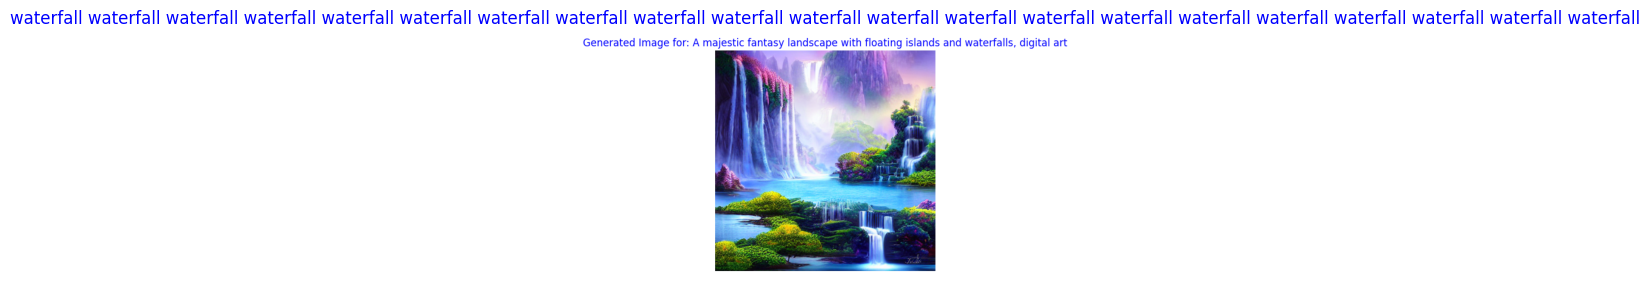

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
try:
    image = Image.open("download.png")
    print("Image 'download.png' loaded successfully.")
except FileNotFoundError:
    print("Error: download.png not found. Please make sure the image is in the correct directory.")
    image = None

# Use the existing image_captioner pipeline from cell 6c2a0498
if 'image_captioner' in globals() and image:
    try:
        caption_results = image_captioner(image)
        print("Generated Caption:", caption_results)

        # Display the image with the caption
        plt.imshow(image)
        plt.axis("off")
        if caption_results:
            plt.title(caption_results[0]["generated_text"], fontsize=12, color="blue")
        plt.show()
    except Exception as e:
        print(f"Error generating caption or displaying image: {e}")
else:
    print("Image captioner pipeline not found or image could not be loaded.")
    print("Please ensure cell 6c2a0498 has been run to initialize the image_captioner.")